# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,ladies and gentlemen please welcome the stage ...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank ...,Bill Burr
dave,this dave tells dirty jokes for living that st...,Dave Chappelle
gabriel,can you please state your name martin moreno b...,Gabriel Iglesias
hasan,what davis what home had bring back here netfl...,Hasan Minhaj
jim,ladies and gentlemen please welcome the stage ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what th...,Joe Rogan
john,armed with boyish charm and sharp wit the form...,John Mulaney
kevin,streaming netflix from november what was looki...,Kevin Hart


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome the stage ...,Ali Wong,0.043424,0.468201
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.052213,0.558707
bill,all right thank you thank you very much thank ...,Bill Burr,0.015024,0.535149
dave,this dave tells dirty jokes for living that st...,Dave Chappelle,-0.000650,0.510267
gabriel,can you please state your name martin moreno b...,Gabriel Iglesias,0.114159,0.485194
hasan,what davis what home had bring back here netfl...,Hasan Minhaj,0.092618,0.453415
jim,ladies and gentlemen please welcome the stage ...,Jim Jefferies,0.050618,0.531347
joe,ladies and gentlemen welcome joe rogan what th...,Joe Rogan,0.080801,0.532994
john,armed with boyish charm and sharp wit the form...,John Mulaney,0.081389,0.478440
kevin,streaming netflix from november what was looki...,Kevin Hart,0.118652,0.483338


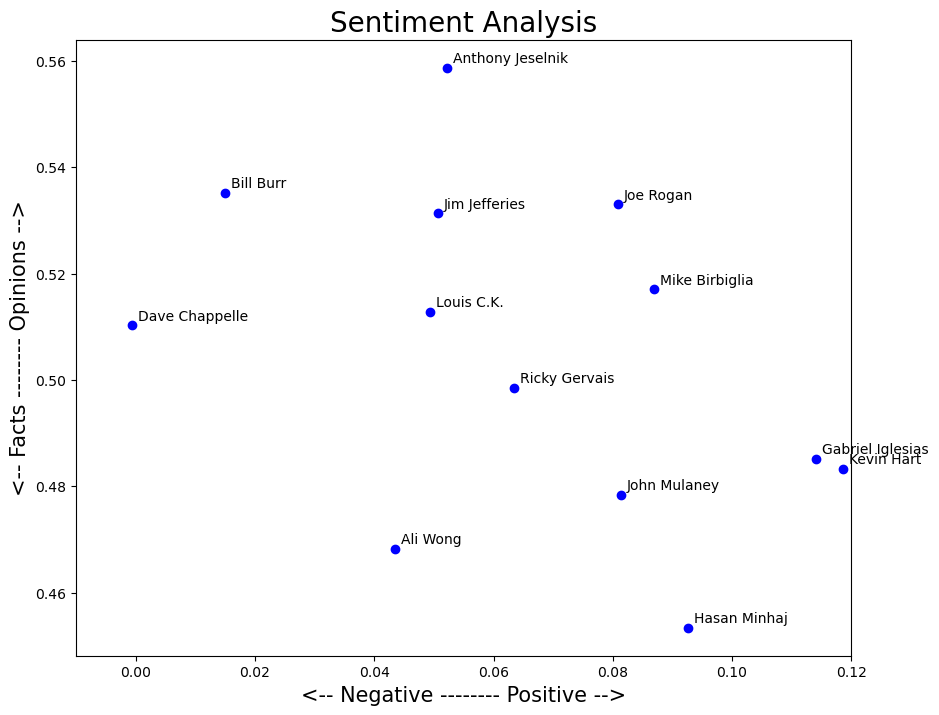

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome the stage ...,Ali Wong,0.043424,0.468201
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.052213,0.558707
bill,all right thank you thank you very much thank ...,Bill Burr,0.015024,0.535149
dave,this dave tells dirty jokes for living that st...,Dave Chappelle,-0.000650,0.510267
gabriel,can you please state your name martin moreno b...,Gabriel Iglesias,0.114159,0.485194
hasan,what davis what home had bring back here netfl...,Hasan Minhaj,0.092618,0.453415
jim,ladies and gentlemen please welcome the stage ...,Jim Jefferies,0.050618,0.531347
joe,ladies and gentlemen welcome joe rogan what th...,Joe Rogan,0.080801,0.532994
john,armed with boyish charm and sharp wit the form...,John Mulaney,0.081389,0.478440
kevin,streaming netflix from november what was looki...,Kevin Hart,0.118652,0.483338


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [7]:
# The list has 13 elements, one for each transcript
len(list_pieces)

13

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.08630347054075868,
  0.037180973266499585,
  0.061367974500885894,
  0.06500132275132274,
  -0.03542135642135643,
  0.081509852994228,
  0.025621045621045627,
  0.07258367839889578,
  -0.016907701352145792,
  0.049659863945578225],
 [0.13374531883460458,
  -0.07693026151930263,
  -0.042756361803980854,
  0.03112041467304626,
  0.12462667803576893,
  0.12215432577372876,
  0.1019318181818182,
  0.003403411009793984,
  0.0225557684574078,
  0.10826651252787615],
 [-0.036058901416044266,
  0.004611017002321355,
  0.015555592746314377,
  0.004584793513364937,
  -0.029008923466470646,
  0.08240482556659025,
  0.03522341855675186,
  -0.021430281882868097,
  -0.016258443093549492,
  0.10224078928207374],
 [-0.046716015466015476,
  -0.024523614523614522,
  0.061398363541220656,
  0.02821417528050179,
  -0.01114038511579495,
  0.08106464025818862,
  -0.126256105006105,
  -0.0796510101010101,
  -0.04173028548028547,
  0.15448341836734694],
 [0.15136913190651513,
  0.1362246413717002,
  0.089

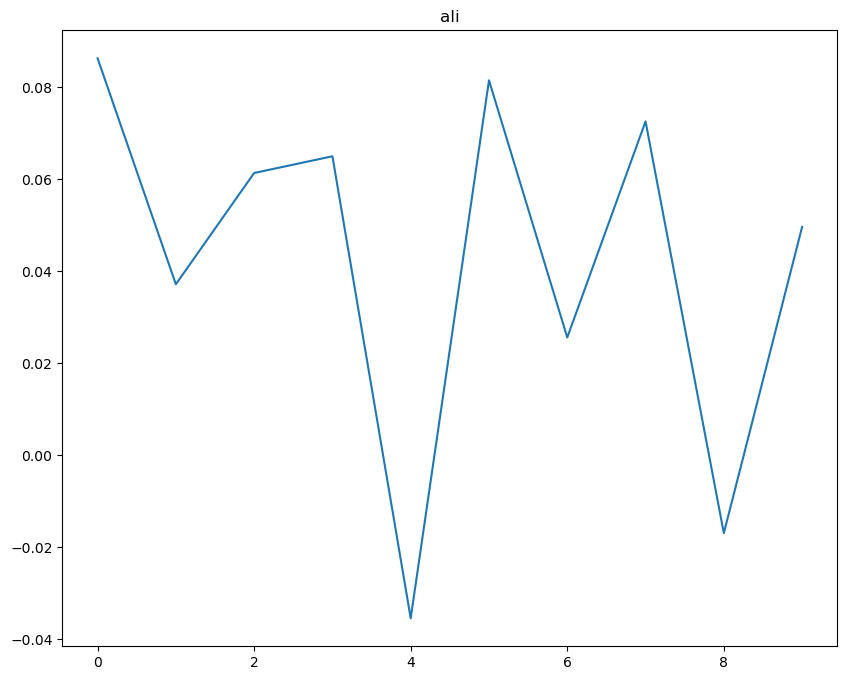

In [10]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

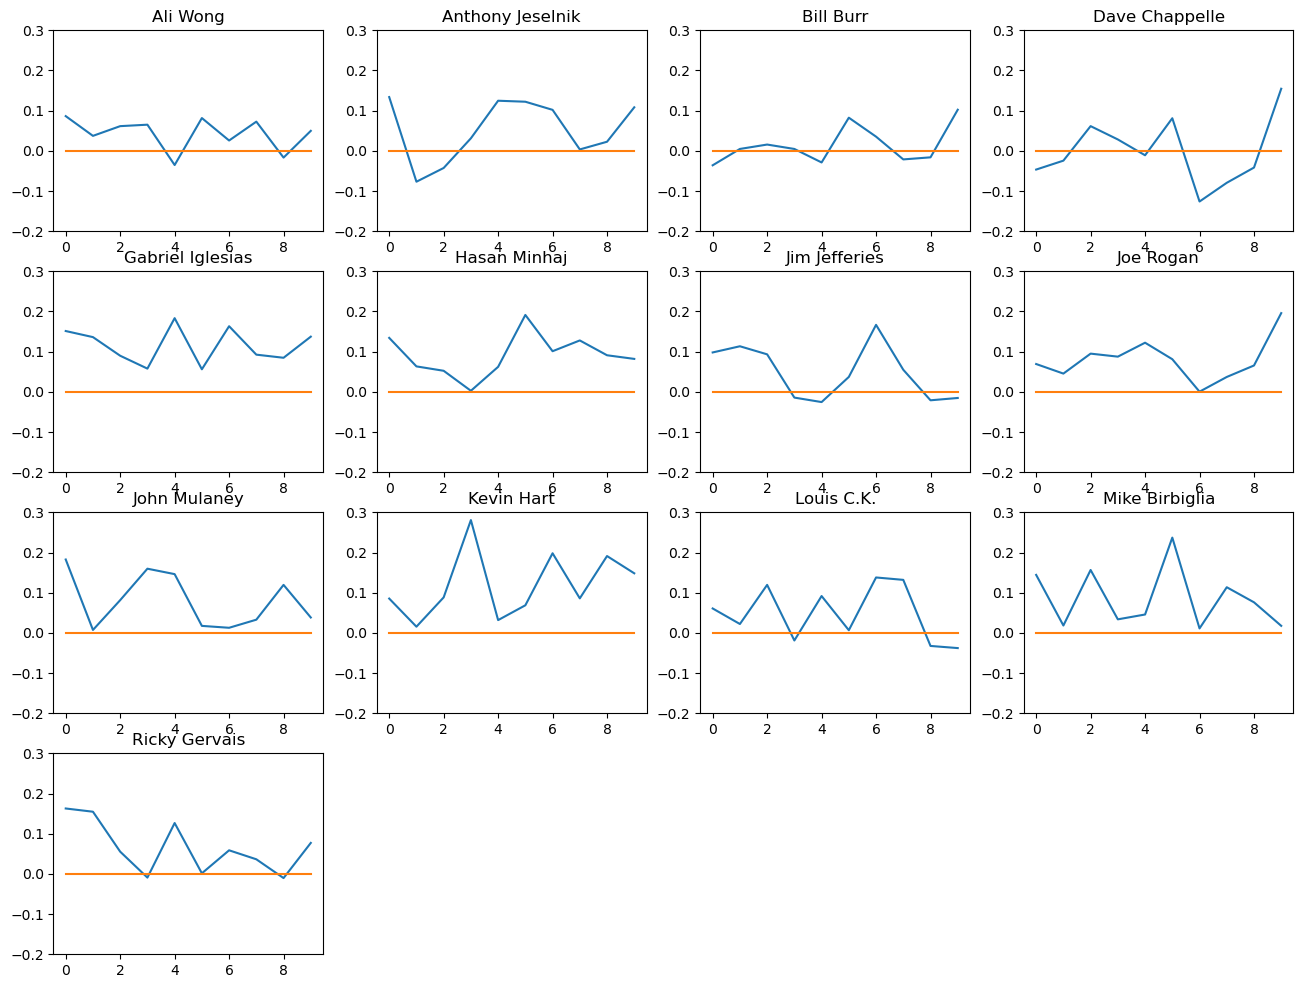

In [11]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [12]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.5665859564164648,
  0.39593462823725983,
  0.340430754196577,
  0.4886653439153441,
  0.43333621933621946,
  0.514428041576479,
  0.46536172161172157,
  0.5634385783298828,
  0.5190388007054675,
  0.47688775510204084],
 [0.5658375850340134,
  0.5960043191207576,
  0.6267321743512219,
  0.5829257487152223,
  0.4746362433862434,
  0.5331346514182336,
  0.526038961038961,
  0.6682020107552021,
  0.5153129657228017,
  0.4898641446936901],
 [0.6556937903366472,
  0.4150172532781228,
  0.5344047990955206,
  0.5841891706177418,
  0.5300237891039777,
  0.5215618368559546,
  0.5369692036358702,
  0.5445778598795838,
  0.4933611955420467,
  0.5613295471093633],
 [0.5119734432234433,
  0.47587438087438094,
  0.4925756782899643,
  0.5051158450393145,
  0.4741055165235494,
  0.5278119520861455,
  0.5623550061050061,
  0.5277744107744108,
  0.5312955812955815,
  0.4775609410430839],
 [0.4993233739261776,
  0.4754264129894381,
  0.5369044339498884,
  0.411376655925528,
  0.5086841403227959,
  0.5

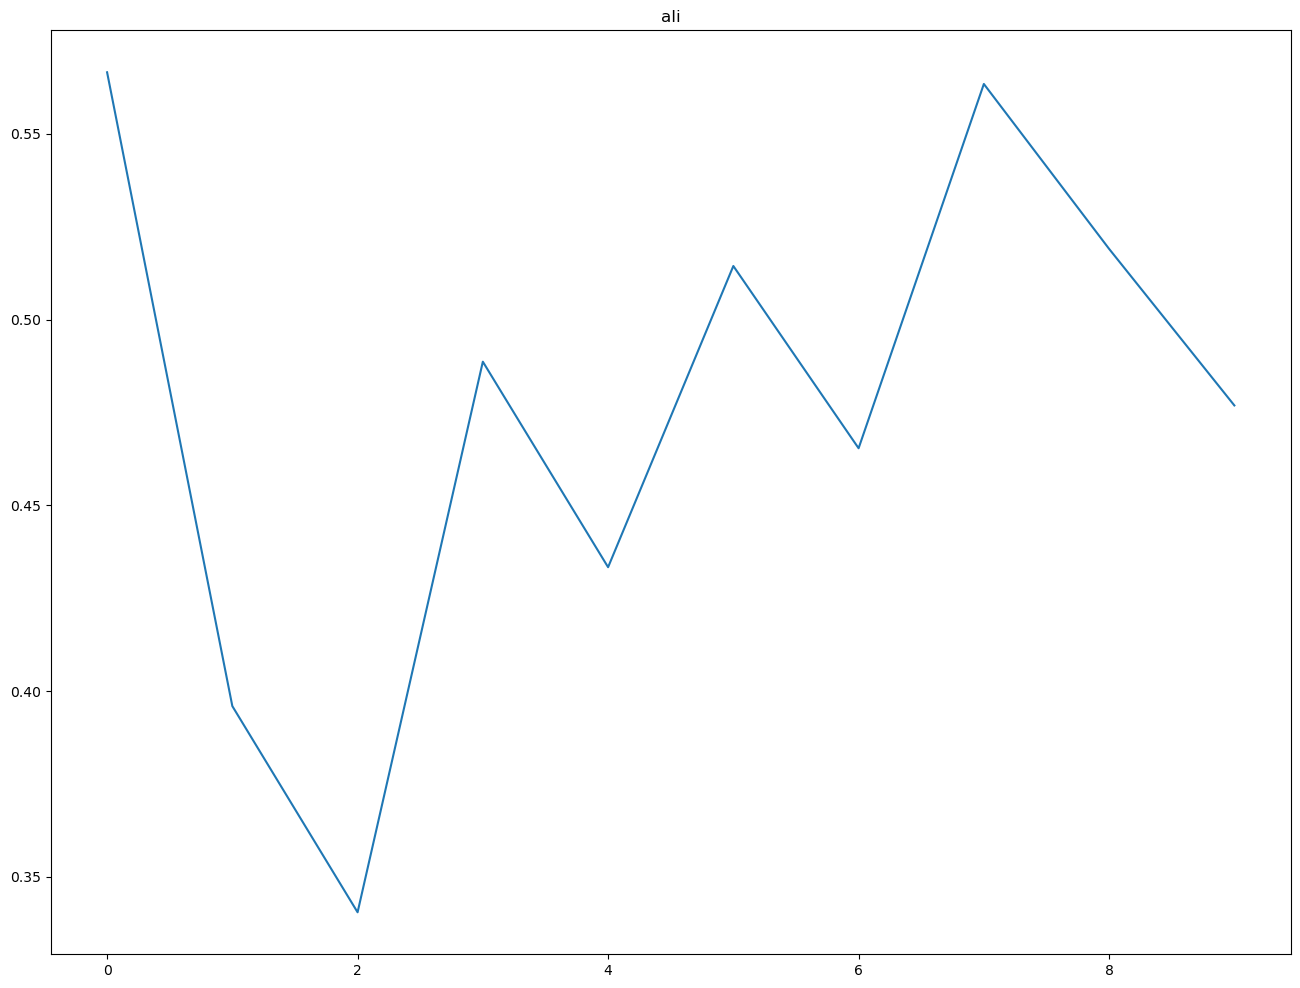

In [13]:
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

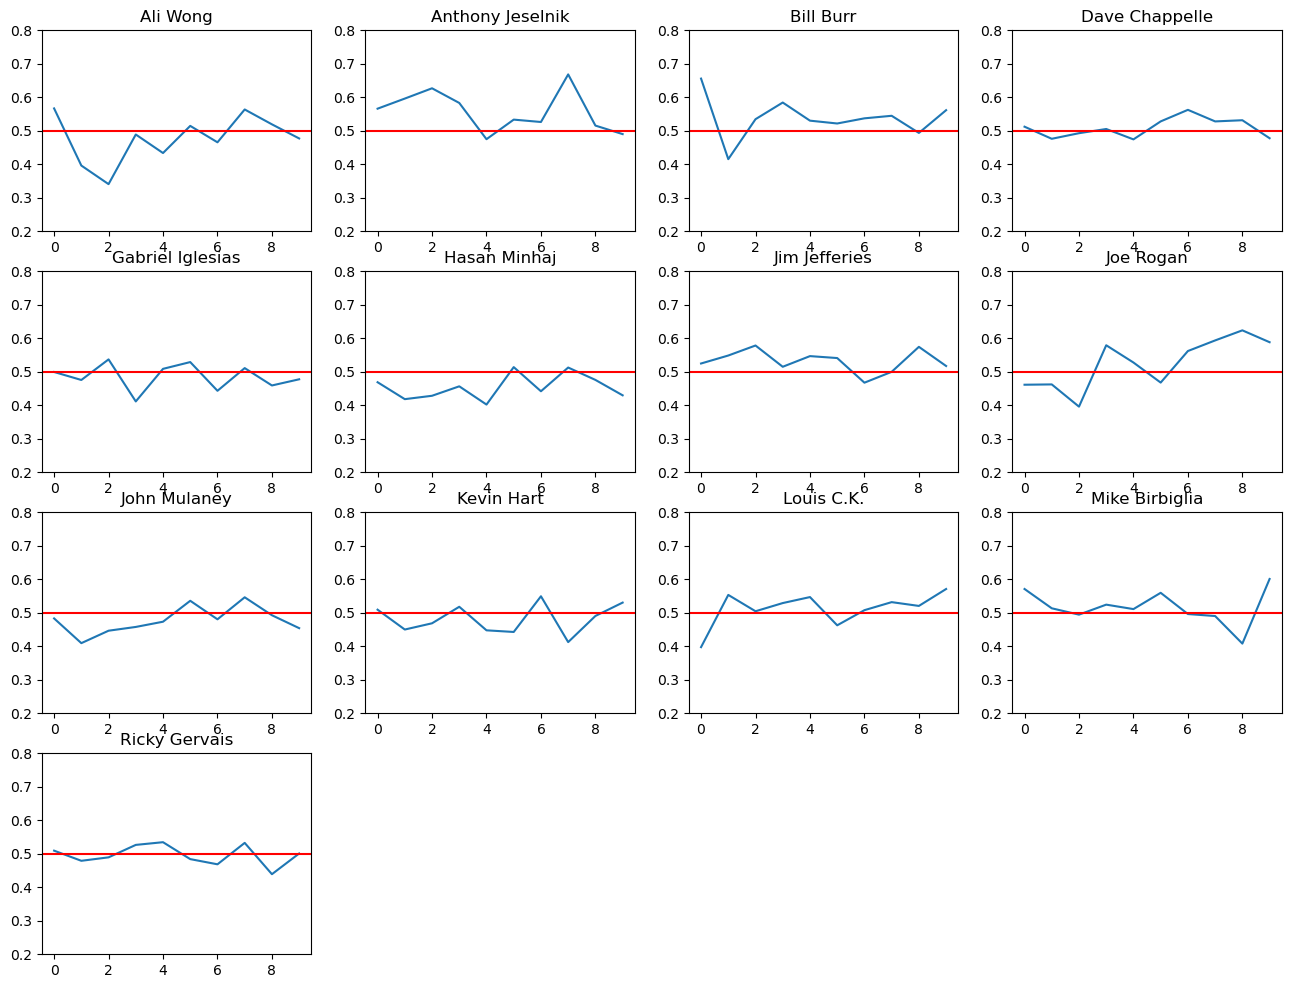

In [14]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.axhline(y = .5,color='r')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=.2, ymax=.8)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


### Assignment Solution
1. Classify all comedian accordig to Polarity and Subjectivity.

In [15]:
def calpolsub(polarity_transcript,subjectivity_transcript):
    subavg=[]
    polavg=[]
    for i,comedian in enumerate(data.index):
        subavg1=sum(subjectivity_transcript[i])/len(subjectivity_transcript[i])
        polavg1=sum(polarity_transcript[i])/len(polarity_transcript[i])
        subavg.append(subavg1)
        polavg.append(polavg1)
    return subavg,polavg



In [16]:
subavg,polavg=calpolsub(polarity_transcript,subjectivity_transcript)

In [17]:
def classify_text(polarity,subjectivity):
    # classify polarity
    if polarity > 0:
        polarity_class = "Positive"
    elif polarity < 0:
        polarity_class = "Negative"
    else:
        polarity_class = "Neutral"
    
    # classify subjectivity
    if subjectivity > 0.5:
        subjectivity_class = "Subjective"
    else:
        subjectivity_class = "Objective"
    
    return polarity_class, subjectivity_class

In [18]:
for i,comedian in enumerate(data.index):
    print(data['full_name'][i]," - ",classify_text(polavg[i],subavg[i]))

Ali Wong  -  ('Positive', 'Objective')
Anthony Jeselnik  -  ('Positive', 'Subjective')
Bill Burr  -  ('Positive', 'Subjective')
Dave Chappelle  -  ('Negative', 'Subjective')
Gabriel Iglesias  -  ('Positive', 'Objective')
Hasan Minhaj  -  ('Positive', 'Objective')
Jim Jefferies  -  ('Positive', 'Subjective')
Joe Rogan  -  ('Positive', 'Subjective')
John Mulaney  -  ('Positive', 'Objective')
Kevin Hart  -  ('Positive', 'Objective')
Louis C.K.  -  ('Positive', 'Subjective')
Mike Birbiglia  -  ('Positive', 'Subjective')
Ricky Gervais  -  ('Positive', 'Objective')


2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.

In [19]:
# Split each routine into 15 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [20]:
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome the stage ...,Ali Wong,0.043424,0.468201
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.052213,0.558707
bill,all right thank you thank you very much thank ...,Bill Burr,0.015024,0.535149
dave,this dave tells dirty jokes for living that st...,Dave Chappelle,-0.000650,0.510267
gabriel,can you please state your name martin moreno b...,Gabriel Iglesias,0.114159,0.485194
hasan,what davis what home had bring back here netfl...,Hasan Minhaj,0.092618,0.453415
jim,ladies and gentlemen please welcome the stage ...,Jim Jefferies,0.050618,0.531347
joe,ladies and gentlemen welcome joe rogan what th...,Joe Rogan,0.080801,0.532994
john,armed with boyish charm and sharp wit the form...,John Mulaney,0.081389,0.478440
kevin,streaming netflix from november what was looki...,Kevin Hart,0.118652,0.483338


In [21]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    

In [22]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

In [23]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    

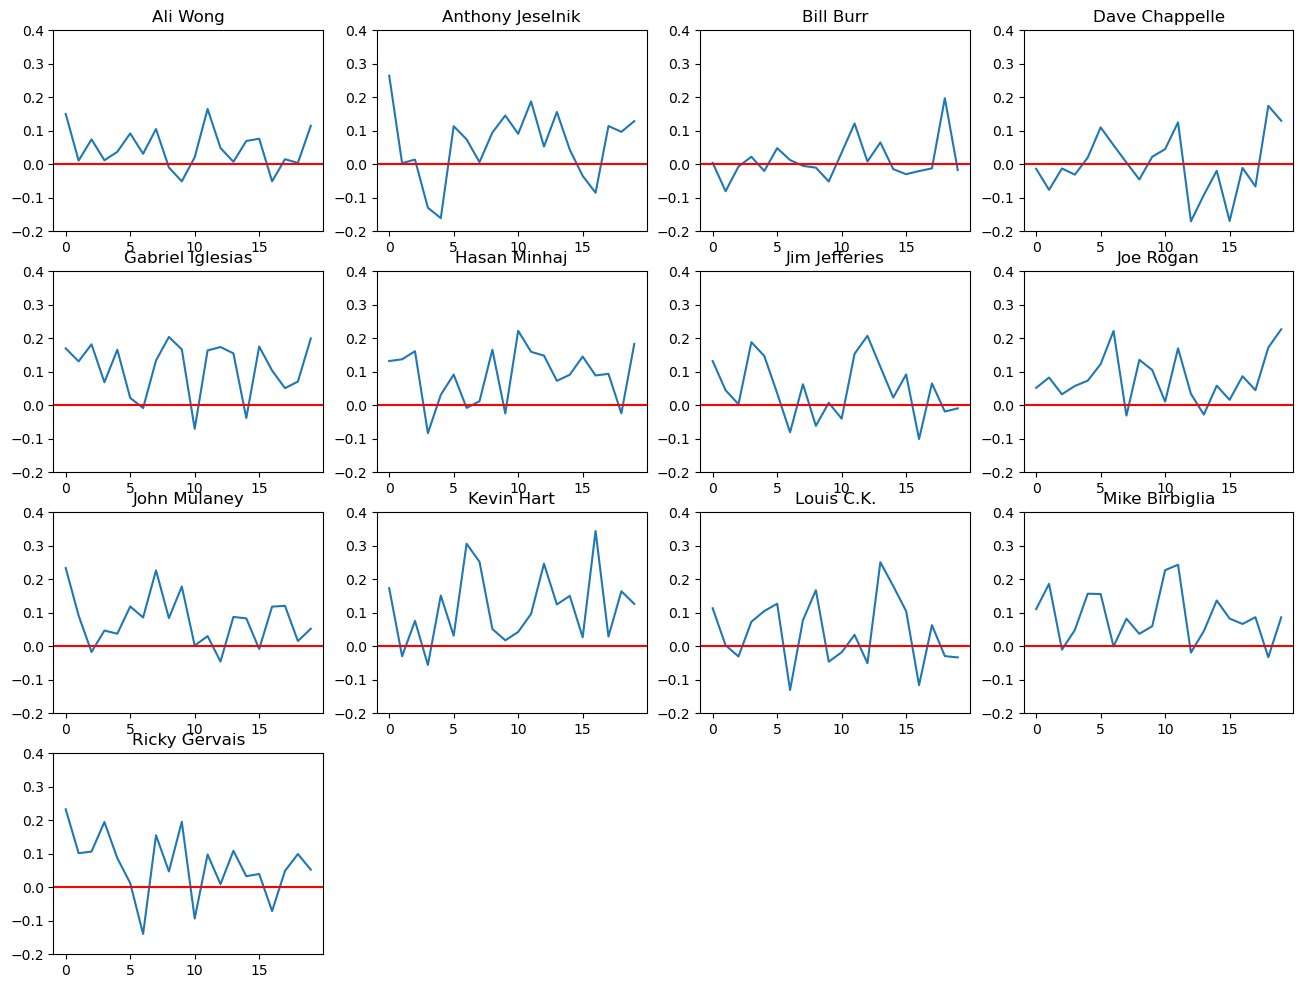

In [24]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.axhline(y = 0,color='r')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.4)
    
plt.show()

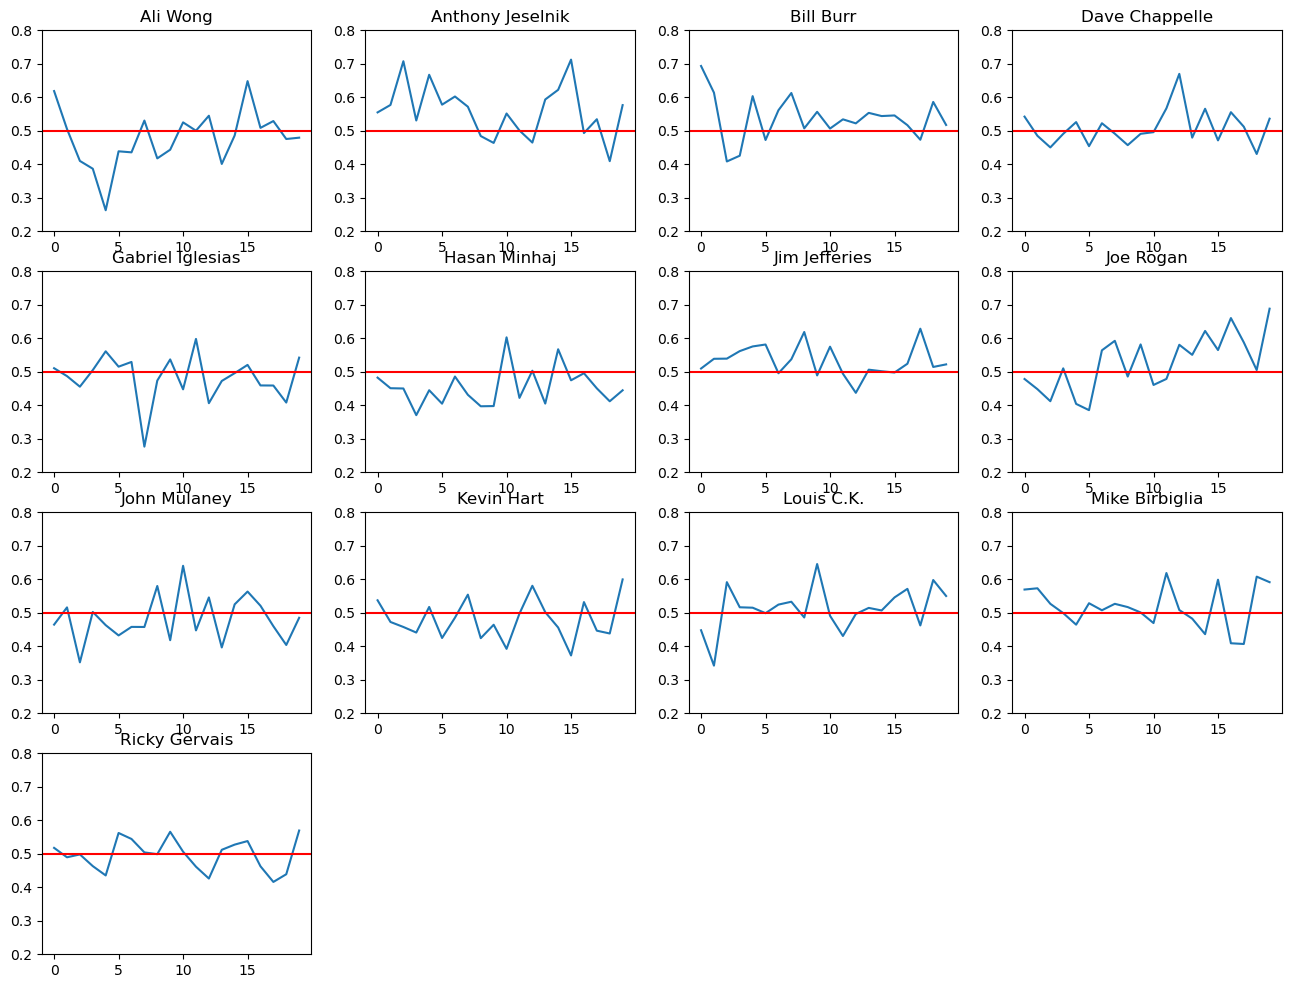

In [25]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.axhline(y = .5,color='r')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=.2, ymax=.8)
    
plt.show()

In [26]:
subavg,polavg=calpolsub(polarity_transcript,subjectivity_transcript)

In [27]:
for i,comedian in enumerate(data.index):
    print(data['full_name'][i]," - ",classify_text(polavg[i],subavg[i]))

Ali Wong  -  ('Positive', 'Objective')
Anthony Jeselnik  -  ('Positive', 'Subjective')
Bill Burr  -  ('Positive', 'Subjective')
Dave Chappelle  -  ('Negative', 'Subjective')
Gabriel Iglesias  -  ('Positive', 'Objective')
Hasan Minhaj  -  ('Positive', 'Objective')
Jim Jefferies  -  ('Positive', 'Subjective')
Joe Rogan  -  ('Positive', 'Subjective')
John Mulaney  -  ('Positive', 'Objective')
Kevin Hart  -  ('Positive', 'Objective')
Louis C.K.  -  ('Positive', 'Subjective')
Mike Birbiglia  -  ('Positive', 'Subjective')
Ricky Gervais  -  ('Positive', 'Objective')


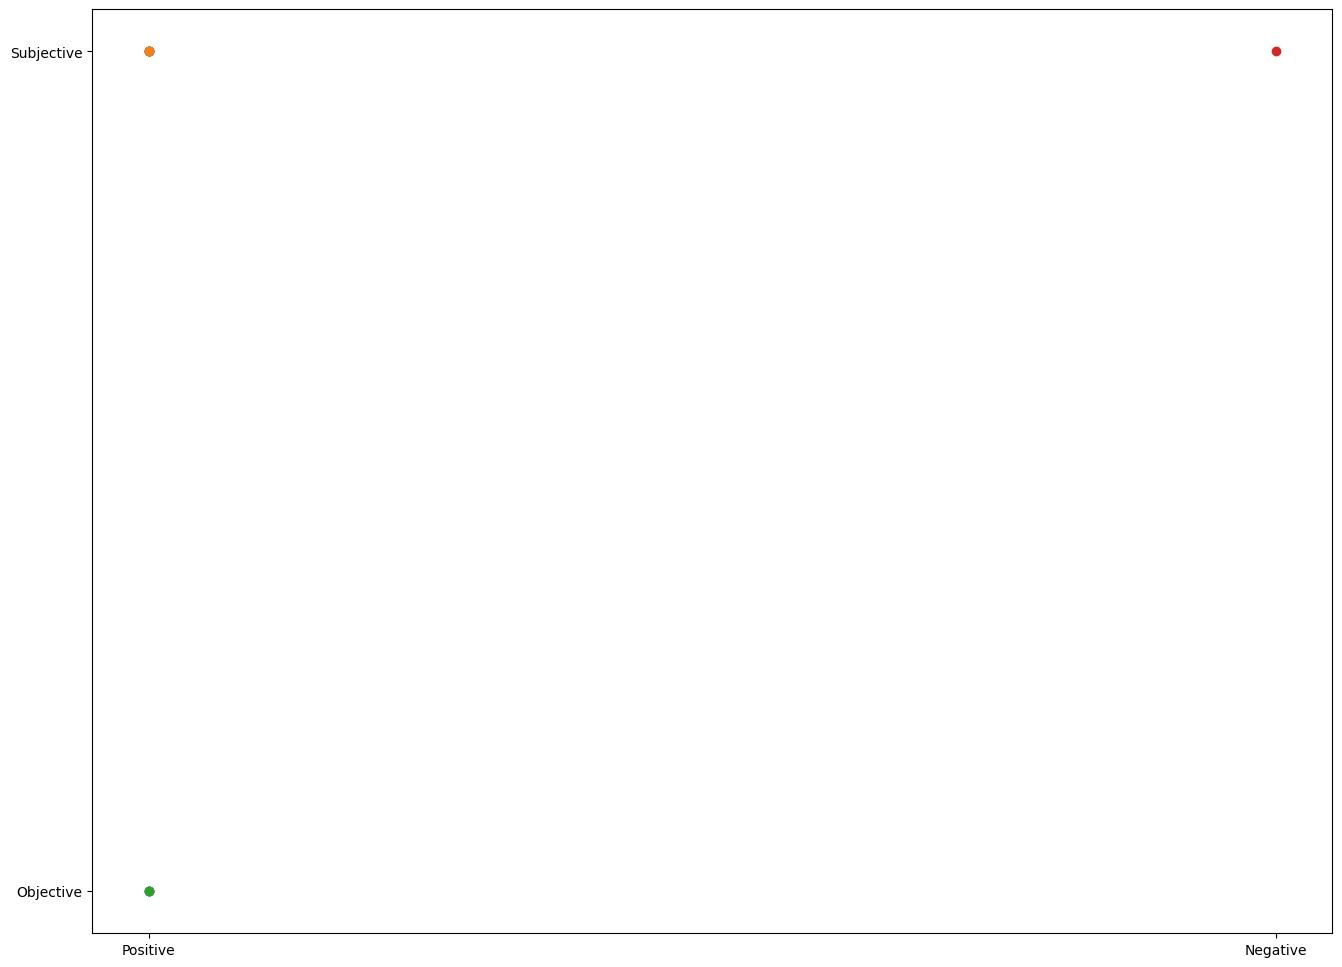

In [38]:
for i,comedian in enumerate(data.index):
    pavg,savg=classify_text(polavg[i],subavg[i])
    plt.scatter(pavg,savg)
    #plt.text(pavg, savg, data['full_name'][i]+'\t', fontsize=10)
    

#### We can see that the charts change with the number of sections per transcript but the overall classification of the comedians remain the same.
